In [217]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

%config InlineBackend.figure_format = 'retina'

In [289]:
import pandas as pd
import us

from collections import OrderedDict
from wordfreq import top_n_list
from wordcloud import WordCloud

from twitter_geo.state_word_counts.db import StateWordCount

In [290]:
states = [s.name.lower() for s in us.states.STATES]

In [287]:
cities = [
    'new york',
    'los angeles',
    'chicago',
    'houston',
    'phoenix',
    'philadelphia',
    'san antonio',
    'san diego',
    'dallas',
    'san jose',
    'austin',
    'jacksonville',
    'san francisco',
    'columbus',
    'indianapolis',
    'fort worth',
    'charlotte',
    'seattle',
    'denver',
    'el paso',
    'washington',
    'boston',
    'detroit',
    'nashville',
    'memphis',
    'portland',
    'oklahoma city',
    'las vegas',
    'louisville',
    'baltimore',
    'milwaukee',
    'albuquerque',
    'tuscon',
    'fresno',
    'sacramento',
    'mesa',
    'kansas city',
    'atlanta',
    'long beach',
    'colorado springs',
    'raleigh',
    'miami',
    'virginia beach',
    'omaha',
    'oakland',
    'minneapolis',
    'tulsa',
    'arlington',
    'new orleans',
    'wichita',
]

In [291]:
def make_geo_set(names):
    geo = set()
    for name in names:
        geo.update(name.split())
    return geo

In [292]:
city_tokens = make_geo_set(cities)

In [293]:
state_tokens = make_geo_set(states)

In [345]:
stopwords = set(top_n_list('en', 100))

In [346]:
blacklist = set.union(stopwords, city_tokens, state_tokens)

In [347]:
state_counts = StateWordCount.state_counts()

In [348]:
def zeta(key1, key2):
    
    data = []
    for token in StateWordCount.tokens():

        if token in blacklist or len(token) < 3:
            continue

        c1 = StateWordCount.state_token_count(key1, token) or 0
        c2 = StateWordCount.state_token_count(key2, token) or 0

        c1 /= state_counts[key1]
        c2 /= state_counts[key2]

        data.append((token, c1-c2))
        
    return pd.DataFrame(data, columns=('token', 'score'))

In [356]:
def draw_wordcloud(word_dict):
    
    wc = WordCloud(
        width=1000,
        height=1000,
        background_color='white',
        prefer_horizontal=1,
        font_path='/System/Library/Fonts/Avenir Next.ttc',
        min_font_size=20,
    )
    
    wc.generate_from_frequencies(word_dict)
    
    fig = plt.gcf()
    DPI = fig.get_dpi()

    plt.figure(figsize=(1000/DPI, 1000/DPI))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

In [357]:
def compare(key1, key2):
    
    df = zeta(key1, key2)
    
    d1 = OrderedDict()
    for r in df.sort_values('score', ascending=False).head(50).itertuples():
        d1[r.token] = r.score
        
    d2 = OrderedDict()
    for r in df.sort_values('score', ascending=True).head(50).itertuples():
        d2[r.token] = -r.score
        
    print(key1)
    draw_wordcloud(d1)
        
    print(key2)
    draw_wordcloud(d2)

AL


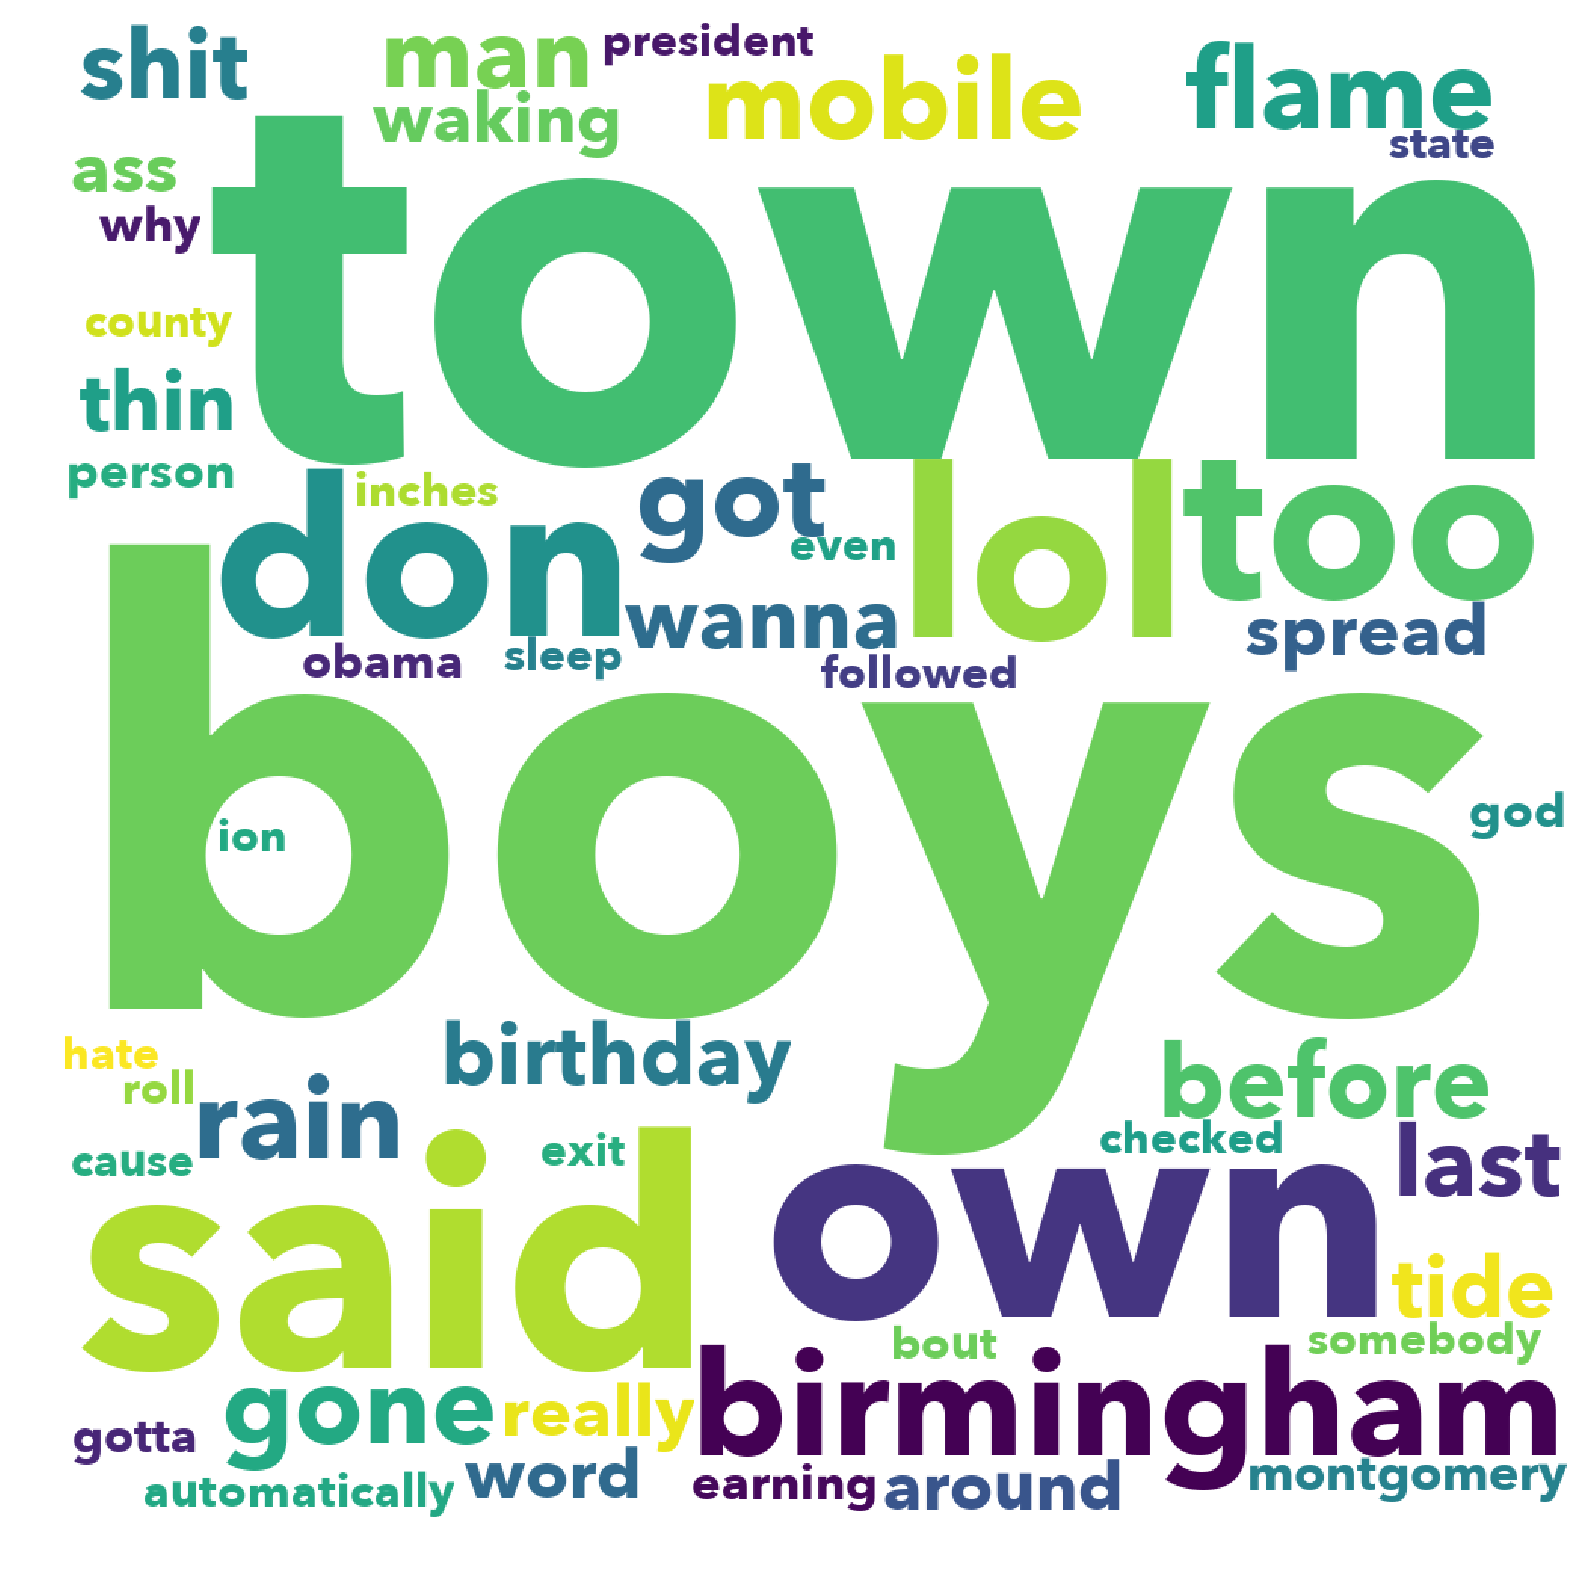

TN


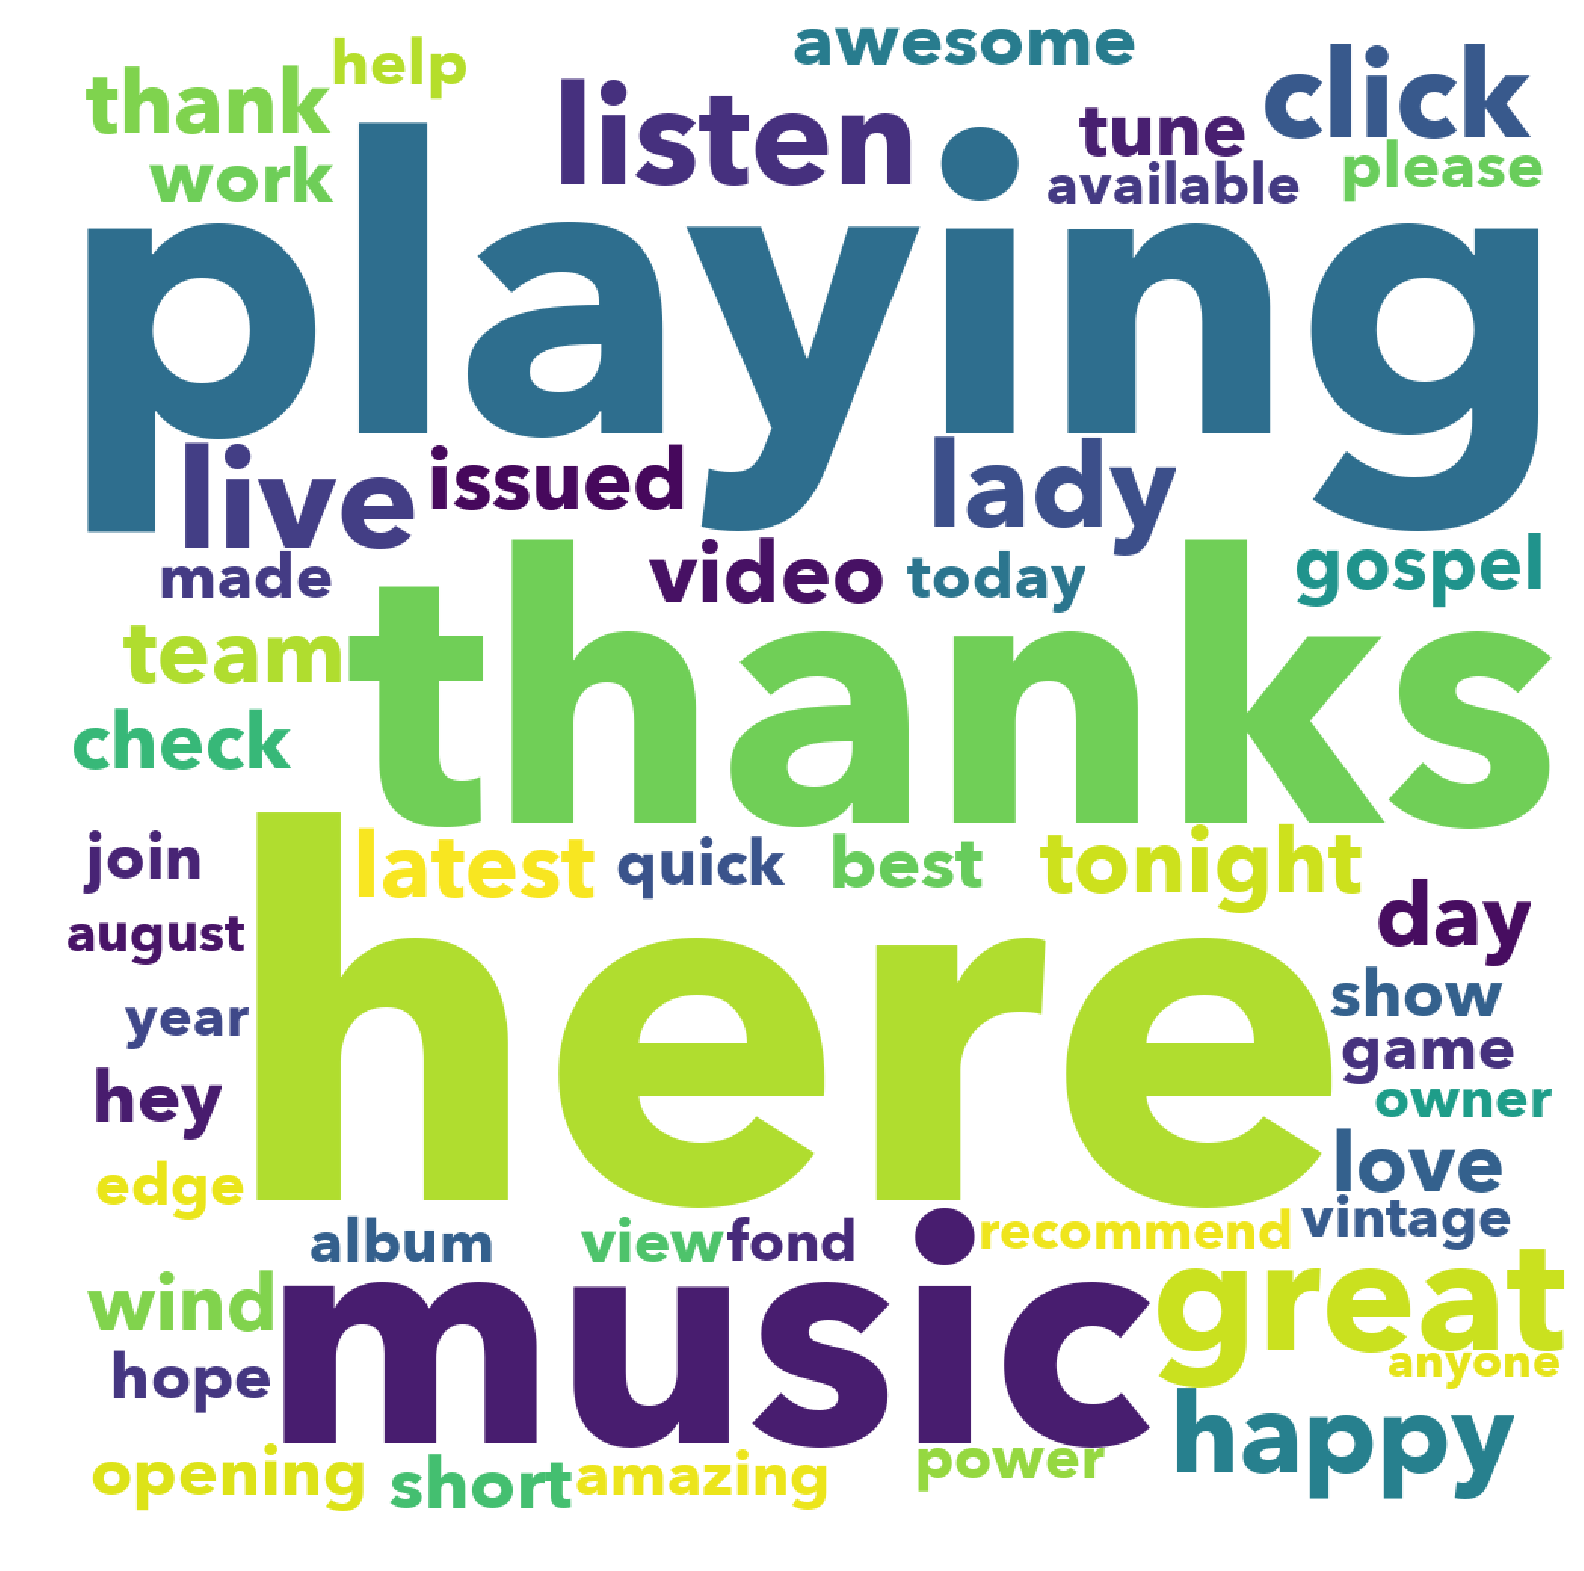

In [365]:
compare('AL', 'TN')